In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

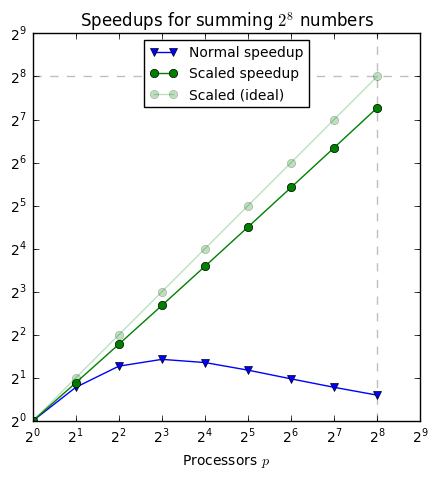

In [102]:
def summation_time(n, p): return n/p + 21 * np.log2(p)
def scaled_speedup(n, p): return n*p / summation_time(n*p, p)
def speedup(n, p): return n / summation_time(n, p)

p_values = np.array([2**e for e in [0,1,2,3,4,5,6,7,8]])
speedups = [speedup(256, p) for p in p_values]
plt.figure(figsize=(5,5))
scaled_speedups = [scaled_speedup(256, p) for p in p_values]
plt.title('Speedups for summing $2^8$ numbers')
plt.plot(p_values, speedups, marker='v', label='Normal speedup')
plt.plot(p_values, scaled_speedups, marker='o', label='Scaled speedup')
plt.plot(p_values, p_values, marker='o', color='green', alpha=0.25, label='Scaled (ideal)')
plt.yscale('log', basey=2)
plt.xscale('log', basex=2)
plt.xlim(1, 2**9)
plt.ylim(1, 2**9)
plt.axhline(256, alpha=0.25, ls='--', color='black')
plt.axvline(256, alpha=0.25, ls='--', color='black')
plt.legend(loc='upper center', fontsize=10)
plt.xlabel('Processors $p$')
plt.show()

In [110]:
cuda_results = pd.read_csv(open('../cuda_results.csv'))
cuda_results

n       cublas       naive       tiled
0     64     6.913081   16.769703   16.334996
1    256   344.359945   93.807122  187.815873
2   1024  1874.182886  109.563347  238.421103
3   4096  2902.340358  111.864960  237.721828
4  16384  3010.130519  111.189877  236.894958

In [131]:
acc_results = pd.read_csv(open('../acc_results.csv'))
acc_results

n          t
0     64   4.128252
1   1024  64.562674
2   4096  74.928093
3  16384  77.065742

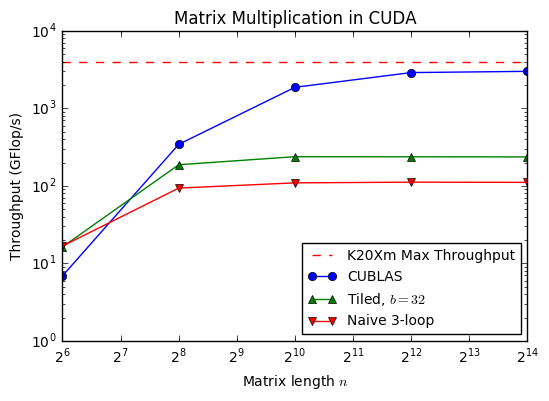

In [130]:
plt.axhline(3950, ls='--', color='red', label='K20Xm Max Throughput')
plt.plot(cuda_results.n, cuda_results.cublas, marker='o', label='CUBLAS', color='blue')
plt.plot(cuda_results.n, cuda_results.tiled, marker='^', label='Tiled, $b=32$', color='green')
plt.plot(cuda_results.n, cuda_results.naive, marker='v', label='Naive 3-loop', color='red')
plt.xscale('log', basex=2)
plt.yscale('log')
plt.title('Matrix Multiplication in CUDA')
plt.legend(loc='best', fontsize=10)
plt.ylabel('Throughput (GFlop/s)')
plt.xlabel('Matrix length $n$')
plt.show()

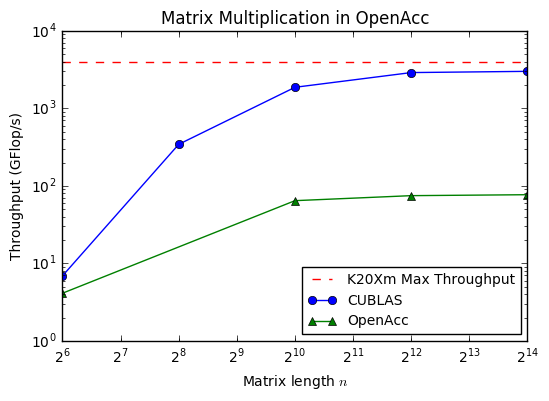

In [136]:
plt.axhline(3950, ls='--', color='red', label='K20Xm Max Throughput')
plt.plot(cuda_results.n, cuda_results.cublas, marker='o', label='CUBLAS', color='blue')
plt.plot(acc_results.n, acc_results.t, marker='^', label='OpenAcc', color='green')
plt.xscale('log', basex=2)
plt.yscale('log')
plt.title('Matrix Multiplication in OpenAcc')
plt.legend(loc='best', fontsize=10)
plt.ylabel('Throughput (GFlop/s)')
plt.xlabel('Matrix length $n$')
plt.show()